In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df1=df.copy()

In [4]:
df1.shape

(5572, 5)

In [5]:
df1.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4460,ham,Thanks again for your reply today. When is ur ...,NaN,NaN,NaN
5200,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
2167,ham,Yes.he have good crickiting mind,NaN,NaN,NaN
3288,spam,Camera - You are awarded a SiPix Digital Camer...,NaN,NaN,NaN
4619,ham,THIS IS A LONG FUCKIN SHOWR,NaN,NaN,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning:

1.**Unamed-2,Unamed-3,Unamed-4**:They do not seem to add any value to our overall goal so I am planning to drop them.

2.**v1 and v2**:The column name does not provide an any information about these features so I will rename it to 'Type' and 'Text'.

3.**v2**:To gain useful insight, I'll change Ham to '0' and spam to '1' using Label Encoding.


In [7]:
df1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [8]:
df1=df1.rename(columns={'v1':'Type','v2':'Text'})

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df1.Type=le.fit_transform(df1.Type)

In [11]:
df1.sample(5)

,Type,Text
1823,0,Same as u... Dun wan... Y u dun like me alread...
2550,0,Please sen :)my kind advice :-)please come her...
2607,0,:-) yeah! Lol. Luckily i didn't have a starrin...
4884,0,Poor girl can't go one day lmao
4687,0,Hmmm.but you should give it on one day..


In [12]:
df1.isnull().sum()

Type    0
Text    0
dtype: int64

In [13]:
def delete_duplicate_values(df):
    print('Deleting the duplicated values:')
    num=df.duplicated().sum()
    if num>0:
        print(f'There are {num} duplicate values in your dataset.')
        df.drop_duplicates(keep='first',inplace=True)
        print(f'{num} duplicate values have been deleted.')
    else:
        print('There are no duplicate values.')

In [14]:
delete_duplicate_values(df1)

Deleting the duplicated values:
There are 403 duplicate values in your dataset.
403 duplicate values have been deleted.


#EDA

In [15]:
df1.Type.value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

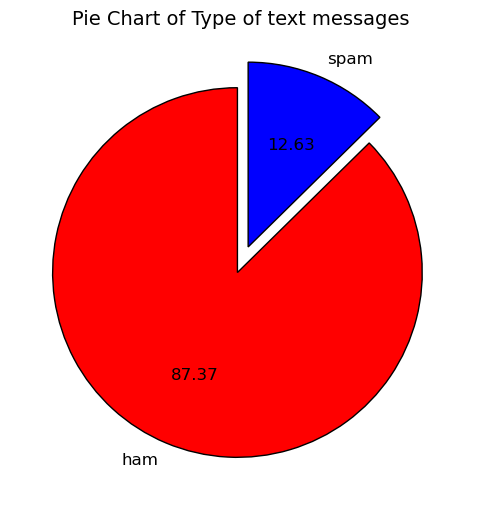

In [16]:
plt.figure(figsize=(6,6))
colors = ['Red', 'Blue']
explode = (0.05, 0.1)

plt.pie(df1.Type.value_counts(),autopct='%0.2f',labels=['ham','spam'],explode=explode,wedgeprops={'edgecolor': 'black'},colors=colors,textprops={'fontsize': 12},startangle=90)
plt.title('Pie Chart of Type of text messages',fontsize=14)
plt.show()

The dataset is highly imbalanced as 87.37% of the data are not spam and 12.63% of the data is spam. However, since my major focus is in maximizing the precision, I will not balance this dataset.

In [17]:
import nltk

In [18]:
#Finding the number of characters in the document:
df1['num_characters'] = df1['Text'].apply(len)

In [19]:
#nltk.download('punkt')
#nltk.download('punkt_tab')
df1['num_words']=df1.Text.apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df1['num_sentences']=df1.Text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df1.sample(5)

,Type,Text,num_characters,num_words,num_sentences
3764,1,Someone U know has asked our dating service 2 ...,137,29,4
233,0,Yes:)here tv is always available in work place..,48,12,1
5486,0,Ofcourse I also upload some songs,33,6,1
4283,0,Yes. I come to nyc for audiitions and am tryin...,60,14,2
766,0,"I'm nt goin, got somethin on, unless they meet...",103,26,1


In [22]:
df1[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


Number of Words: The mean number of words is 18 words per sentence. However there is a sentence which has 220 words which seems way of than the 75th percentile which is 26 words.

Number of Sentences: Usually each document has a mean of 2 sentences, however there is a document that has 38 sentences which is also far of from the 75th percentile which is 2 sentences.

In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
df1[df1.num_words==220]

,Type,Text,num_characters,num_words,num_sentences
1578,0,How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . . &lt;#&gt; . Good listener &lt;#&gt; . Organizer &lt;#&gt; . Good boyfriend &lt;#&gt; . Very clean &lt;#&gt; . Sympathetic &lt;#&gt; . Athletic &lt;#&gt; . Warm . . . &lt;#&gt; . Courageous &lt;#&gt; . Determined &lt;#&gt; . True &lt;#&gt; . Dependable &lt;#&gt; . Intelligent . . . &lt;#&gt; . Psychologist &lt;#&gt; . Pest exterminator &lt;#&gt; . Psychiatrist &lt;#&gt; . Healer . . &lt;#&gt; . Stylist &lt;#&gt; . Driver . . Aaniye pudunga venaam..,611,220,38


This row is an outlier and the formatting of the text of this also looks like a joke. This text does not contain any suspicious word that would categorize it as spam but the words'Aaniye pudunga venaam' is grammatically incorrect. So, I have planned to remove this text as it looks like a potential spam/joke to me.

In [25]:
df1.drop(index=1578,inplace=True)

In [26]:
df1[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5168.0,78.875000,57.769644,2.0,36.0,60.0,117.0,910.0
num_words,5168.0,18.416796,13.027685,1.0,9.0,15.0,26.0,196.0
num_sentences,5168.0,1.958591,1.359164,1.0,1.0,1.0,2.0,18.0


In [27]:
df1[df1.num_words==196]

,Type,Text,num_characters,num_words,num_sentences
1862,0,"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed.",790,196,10


This looks like a geniue message so I am keeping it even when the number of sentences and words is way beyound in comparision with other documnets.

In [28]:
df1[df1.Type==0][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4515.0,70.339535,55.787170,2.0,34.0,52.0,90.0,910.0
num_words,4515.0,17.078848,13.153232,1.0,8.0,13.0,22.0,196.0
num_sentences,4515.0,1.812182,1.274710,1.0,1.0,1.0,2.0,18.0


In [29]:
df1[df1.Type==1][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


From the above table we can clearly see that usually spam emails have a median of 29 words,whereas, ham messages have a median of 13 words. On average, spam messages contains 16 words more than ham messages.

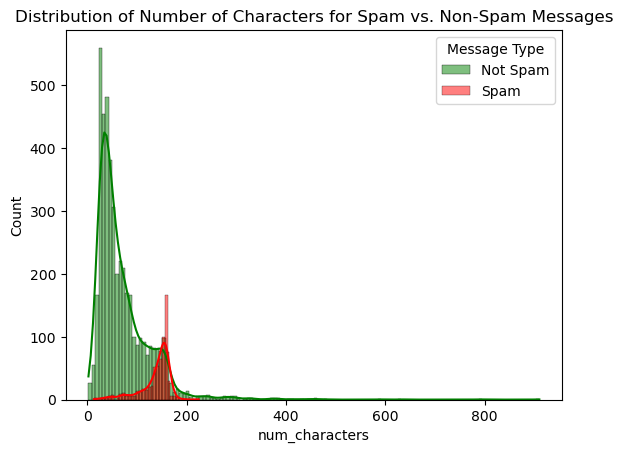

In [30]:
sns.histplot(df1[df1.Type==0]['num_characters'],color='green',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_characters'],color='red',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Characters for Spam vs. Non-Spam Messages')
plt.show()

In [31]:
ham_skewness=df1[df1.Type==0]['num_characters'].skew()
spam_skewness=df1[df1.Type==1]['num_characters'].skew()

In [32]:
print(f' The skewness of characters in not spam messages is: {ham_skewness}')
print(f' The skewness of characters in spam messages is: {spam_skewness}')

 The skewness of characters in not spam messages is: 3.410638138750707
 The skewness of characters in spam messages is: -1.7133837509335121


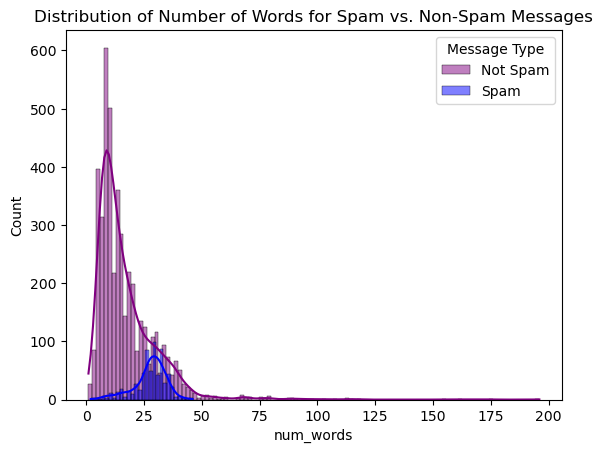

In [33]:
sns.histplot(df1[df1.Type==0]['num_words'],color='purple',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_words'],color='blue',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Words for Spam vs. Non-Spam Messages')
plt.show()

In [34]:
ham_skewness=df1[df1.Type==0]['num_words'].skew()
spam_skewness=df1[df1.Type==1]['num_words'].skew()

In [35]:
print(f' The skewness of words in not spam messages is:{ham_skewness}')
print(f' The skewness of words in spam messages is: {spam_skewness}')

 The skewness of words in not spam messages is:3.34569446738514
 The skewness of words in spam messages is: -0.9478264971647723


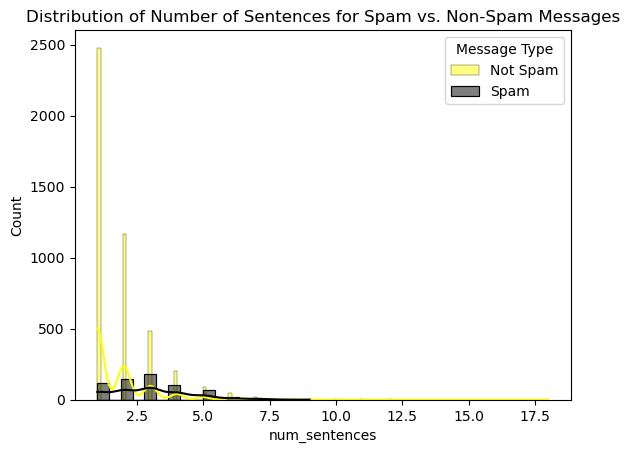

In [36]:
sns.histplot(df1[df1.Type==0]['num_sentences'],color='yellow',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_sentences'],color='black',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Sentences for Spam vs. Non-Spam Messages')
plt.show()

In [37]:
ham_skewness=df1[df1.Type==0]['num_sentences'].skew()
spam_skewness=df1[df1.Type==1]['num_sentences'].skew()

In [38]:
print(f' The skewness of sentences in not spam messages is: {ham_skewness}')
print(f' The skewness of sentences in spam messages is: {spam_skewness}')

 The skewness of sentences in not spam messages is: 3.012645180334055
 The skewness of sentences in spam messages is: 0.6518254613126102


#Text Preprocessing

1. Lowercasing
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuation
5. Stemming

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem import SnowballStemmer
import string

In [40]:
def text_preprocessing(text):
    #Lowercasing the text:
    text=text.lower()
    #Tokenizing the document into words:
    text=nltk.word_tokenize(text)
    #Removing Special characters:
    new_text=[]
    for word in text:
        if word.isalnum():
            new_text.append(word)
    text=new_text[:]
    new_text.clear()
    
    #Removing Stop Words:
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            new_text.append(word)

    text=new_text[:]
    new_text.clear()
    
    #Stemming:
    snow_ball=SnowballStemmer('english')
    for word in text:
        new_text.append(snow_ball.stem(word))

    return " ".join(new_text)

In [41]:
df1['Transformed_Text']=df1.Text.apply(text_preprocessing)
df1.sample(5)

,Type,Text,num_characters,num_words,num_sentences,Transformed_Text
1026,0,Yes da. Any plm at ur office,28,8,2,yes da plm ur offic
1109,0,S s..first time..dhoni rocks...,31,9,1,first time dhoni rock
1188,0,All will come alive.better correct any good looking figure there itself..,73,12,1,come correct good look figur
4646,0,God created gap btwn ur fingers so dat sum1 vry special will fill those gaps by holding ur hands.. Now plz dont ask y he created so much gap between legs !!!,157,35,3,god creat gap btwn ur finger dat sum1 vri special fill gap hold ur hand plz dont ask creat much gap leg
3502,0,Free any day but i finish at 6 on mon n thurs...,48,13,1,free day finish 6 mon n thur


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [43]:
ham_words=df1[df1.Type==0]['Transformed_Text'].str.cat(sep=" ")

In [44]:
ham_wc=wc.generate(ham_words)

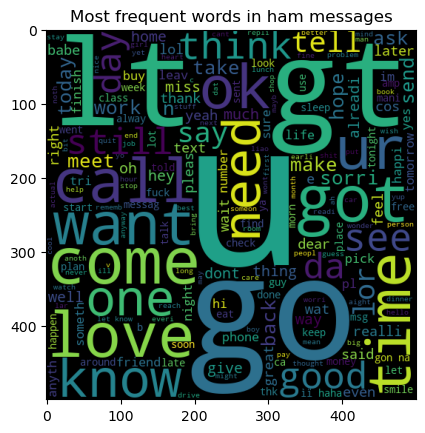

In [45]:
plt.imshow(ham_wc)
plt.title('Most frequent words in ham messages')
plt.show()

In [46]:
spam_words=df1[df1.Type==1]['Transformed_Text'].str.cat(sep=" ")

In [47]:
spam_wc=wc.generate(spam_words)

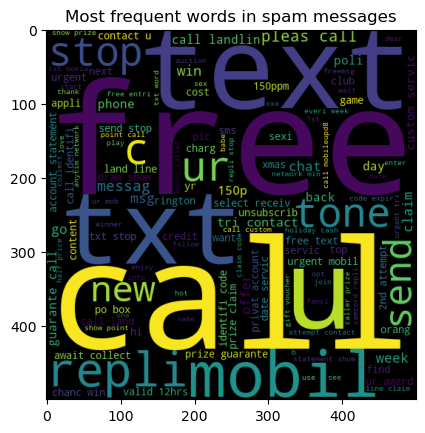

In [48]:
plt.imshow(spam_wc)
plt.title('Most frequent words in spam messages')
plt.show()

In [49]:
#!pip install collections
from collections import Counter

In [50]:
def text_counter(text,number=15):
    all_text=" ".join(text)
    all_word=word_tokenize(all_text)
    word_count=Counter(all_word)
    top_words=word_count.most_common(number)
    return top_words

In [51]:
ham_top_words=text_counter(df1[df1.Type==0]['Transformed_Text'])
ham_df = pd.DataFrame(ham_top_words, columns=['Word', 'Frequency'])

In [52]:
spam_top_words=text_counter(df1[df1.Type==1]['Transformed_Text'])
spam_df = pd.DataFrame(spam_top_words, columns=['Word', 'Frequency'])

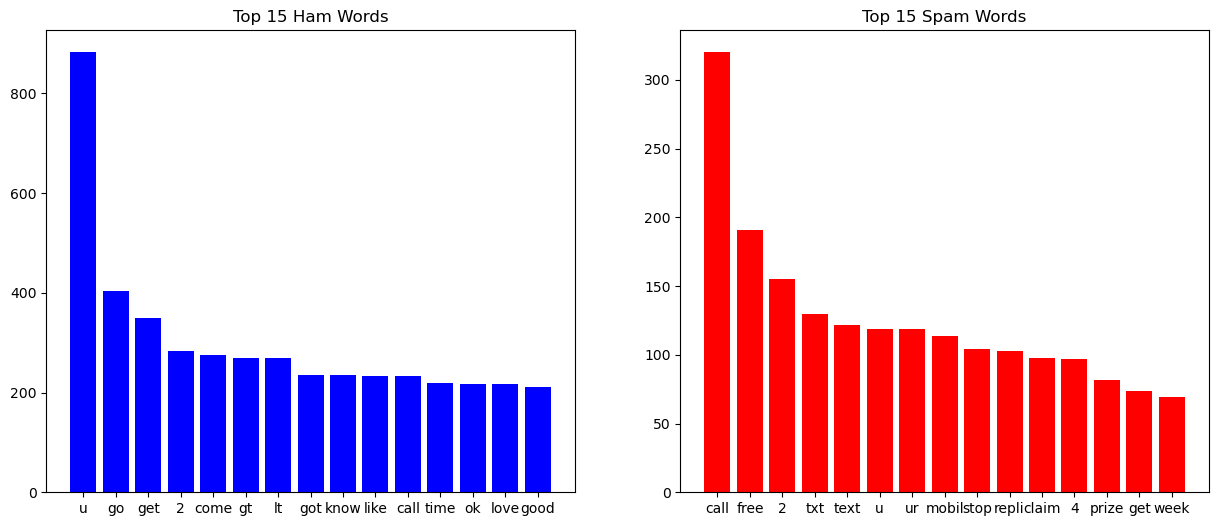

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(ham_df['Word'],ham_df['Frequency'], color='blue')
axes[0].set_title('Top 15 Ham Words')
axes[1].bar(spam_df['Word'],spam_df['Frequency'], color='red')
axes[1].set_title('Top 15 Spam Words')

plt.show()

From the above bar plot and word cloud, we can clearly see that ham messages have a more sober wording,whereas,spam messages have some desparate words like free,prize. Moreover, the word 'call' appears to be present in both ham and spam words,however, the frequency of the word in spam messages is slightly higher even when the dataset is unbalanced.

#Model Bulding and Text Vectorization:

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)

In [55]:
X=tf.fit_transform(df1['Transformed_Text']).toarray()#to convert the sparse array into dense array
X.shape

(5168, 3000)

In [56]:
Y=df1.Type.values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [59]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

mnb=MultinomialNB()
bnb=BernoulliNB()

In [60]:
mnb.fit(X_train,Y_train)
ypred1=mnb.predict(X_test)

In [61]:
print('Multinomial Naive Bayes:')
print('The accuracy score is:',accuracy_score(Y_test,ypred1))
print('The precision score is:',precision_score(Y_test,ypred1))

Multinomial Naive Bayes:
The accuracy score is: 0.971953578336557
The precision score is: 0.9906542056074766


Confusion Matrix for Multinomial Naive Bayes:


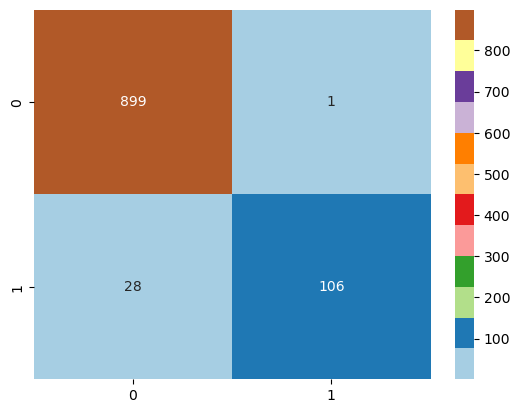

In [62]:
from sklearn import metrics
print('Confusion Matrix for Multinomial Naive Bayes:')
cm=confusion_matrix(Y_test,ypred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Paired')
plt.show()

In [63]:
bnb.fit(X_train,Y_train)
ypred2=bnb.predict(X_test)

In [64]:
print('Bernoulli Naive Bayes:')
print('The accuracy score is:',accuracy_score(Y_test,ypred2))
print('The precision score is:',precision_score(Y_test,ypred2))

Bernoulli Naive Bayes:
The accuracy score is: 0.9777562862669246
The precision score is: 0.9911504424778761


Confusion Matrix for Bernoulli Naive Bayes:


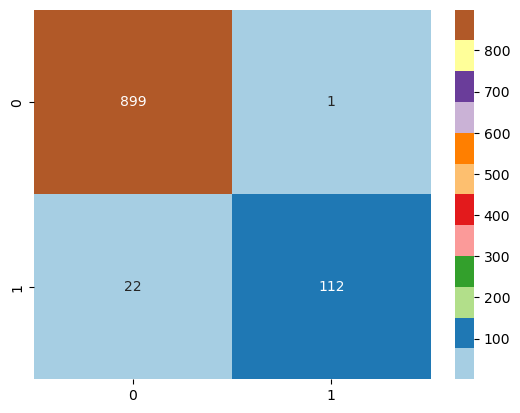

In [65]:
print('Confusion Matrix for Bernoulli Naive Bayes:')
cm=confusion_matrix(Y_test,ypred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Paired')
plt.show()

Since precision is more important as we do not want any of the ham messages to be considered as spam, we can see that both the naive bayes has a good precision.So, we can use any.But just incase, we can also try to work with other machine learning algorithms and see if they can give us better results.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
lr=LogisticRegression(penalty='l1')
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50, random_state=42)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=42)

In [68]:
classifiers={
    "SVC":svc,
    "KNN":knn,
    "DT":dtc,
    "RF":rfc,
    "GB":gbc,
    "MNB":mnb,
    "BNB":bnb
}

In [69]:
def train_classifier(classifier,X_train,Y_train,X_test,Y_test):
    classifier.fit(X_train,Y_train)
    Y_pred=classifier.predict(X_test)
    
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)

    #print(f' The accuracy of the model {classifier} is: {accuracy}')
    #print(f' The precision of the model {classifier} is: {precision}')

    return accuracy,precision

In [70]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.971953578336557, 0.9906542056074766)

In [71]:
#from sklearn.metrics import accuracy_score, precision_score

accuracy_scores=[]
precision_scores=[]

for models,clf in classifiers.items():
    acc,pre=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    accuracy_scores.append(acc)
    precision_scores.append(pre)

In [72]:
performance_dataframe=pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_dataframe

,Algorithm,Accuracy,Precision
1,KNN,0.910058,1.000000
6,BNB,0.977756,0.991150
0,SVC,0.971954,0.990654
5,MNB,0.971954,0.990654
3,RF,0.970019,0.990476
4,GB,0.943907,0.931818
2,DT,0.933269,0.842105


Looking at the precison and accuracy, I have conculded that I will use Bernoulli Naive Bayes to train my model.

In [74]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

In [77]:
df1['Transformed_Text'] = df1['Transformed_Text'].astype(str)

In [78]:
df1.to_csv('spam_cleaned.csv',index=False)